## Exercise 1: Decisive Distributions

### Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env environment variables
from dotenv import load_dotenv
load_dotenv('../../../../../../classkeys.env')

%matplotlib inline

In [2]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

### Read in stock data using Alpaca API

In [4]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the stock tickers
tickers = ['GOOG', 'AAPL', 'JNJ', 'TIGR']

# Get 1 year's worth of historical data for all stocks
df_ticker = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date, limit=1000).df

# Display sample data
df_ticker.head()

AAPL                                       \
                             open      high      low   close    volume   
time                                                                     
2019-05-01 00:00:00-04:00  209.88  215.3100  209.230  210.52  57751414   
2019-05-02 00:00:00-04:00  209.84  212.6500  208.130  209.17  29014844   
2019-05-03 00:00:00-04:00  210.74  211.8400  210.230  211.78  17987793   
2019-05-06 00:00:00-04:00  204.29  208.8400  203.500  208.60  28949691   
2019-05-07 00:00:00-04:00  205.88  207.4175  200.825  202.86  34328425   

                              GOOG                                          \
                              open       high        low    close   volume   
time                                                                         
2019-05-01 00:00:00-04:00  1188.05  1188.0500  1167.1800  1167.92  2458890   
2019-05-02 00:00:00-04:00  1167.76  1174.1895  1155.0018  1162.48  1795505   
2019-05-03 00:00:00-04:00  1173.65  1186.8000  1169.0000  1185.56  1768455   
2019-05-06 00:00:00-04:00  1166.26  1190.8500  1166.2600  1189.51  1428613   
2019-05-07 00:00:00-04:00  1180.47  1190.4400  1161.0400  1174.62  1346224   

                              JNJ                                    TIGR  \
                             open    high     low   close   volume   open   
time                                                                        
2019-05-01 00:00:00-04:00  140.95  142.35  139.75  141.93  4879219  13.75   
2019-05-02 00:00:00-04:00  141.91  142.15  140.12  141.28  7454665  13.66   
2019-05-03 00:00:00-04:00  141.29  142.09  141.08  141.92  3978403  13.32   
2019-05-06 00:00:00-04:00  140.25  142.24  139.93  142.07  3445868  12.29   
2019-05-07 00:00:00-04:00  140.82  141.38  139.06  139.98  5269848  12.60   

                                                              
                              high      low   close   volume  
time                                                          
2019-05-01 00:00:00-04:00  14.3186  13.4100  13.505   983006  
2019-05-02 00:00:00-04:00  13.9400  12.9500  13.170   809903  
2019-05-03 00:00:00-04:00  13.6300  12.5600  13.290  1075474  
2019-05-06 00:00:00-04:00  12.9500  12.2019  12.600  2725129  
2019-05-07 00:00:00-04:00  12.9400  10.7000  10.940  6330920

### Create a new DataFrame and store the closing prices of each stock.

In [6]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices for all the tickers
for stocks in tickers:
    df_closing_prices[stocks] = df_ticker[stocks]['close']

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head()

,GOOG,AAPL,JNJ,TIGR
2019-05-01,1167.92,210.52,141.93,13.505
2019-05-02,1162.48,209.17,141.28,13.170
2019-05-03,1185.56,211.78,141.92,13.290
2019-05-06,1189.51,208.60,142.07,12.600
2019-05-07,1174.62,202.86,139.98,10.940


### Calculate the daily returns for each stock using the `pct_change()` function

In [8]:
# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns.head()

,GOOG,AAPL,JNJ,TIGR
2019-05-02,-0.004658,-0.006413,-0.004580,-0.024806
2019-05-03,0.019854,0.012478,0.004530,0.009112
2019-05-06,0.003332,-0.015016,0.001057,-0.051919
2019-05-07,-0.012518,-0.027517,-0.014711,-0.131746
2019-05-08,-0.007560,0.000197,-0.001000,-0.022852


### Plot Distributions

In [14]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'STD'}, ylabel='Frequency'>

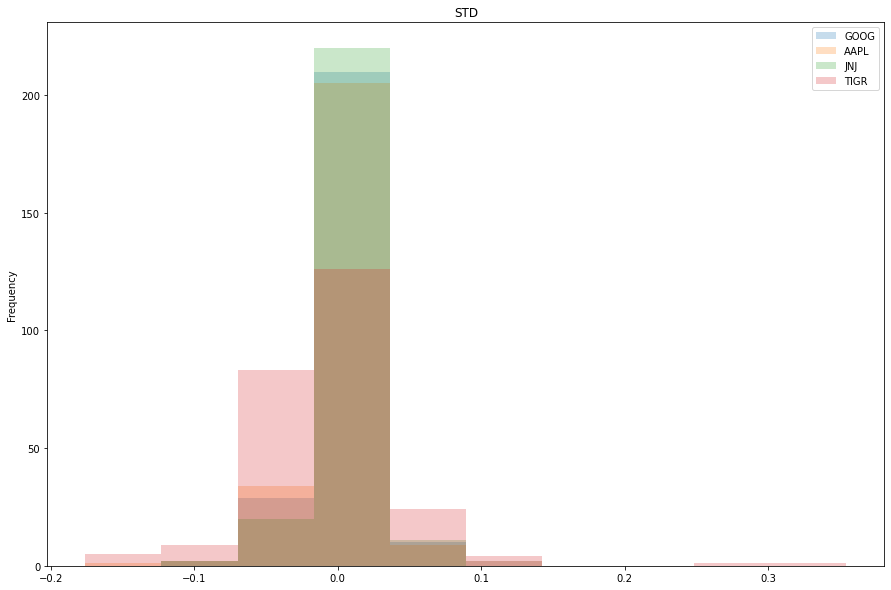

In [24]:
# Visualize the distribution of daily returns across all stocks using a histogram plot
# Hint: To make the plot easier to read, set the alpha arguement to 0.5
# YOUR CODE HERE!
df_daily_returns.plot.hist(alpha=0.25, figsize=(15, 10), title='STD')

(array([-0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

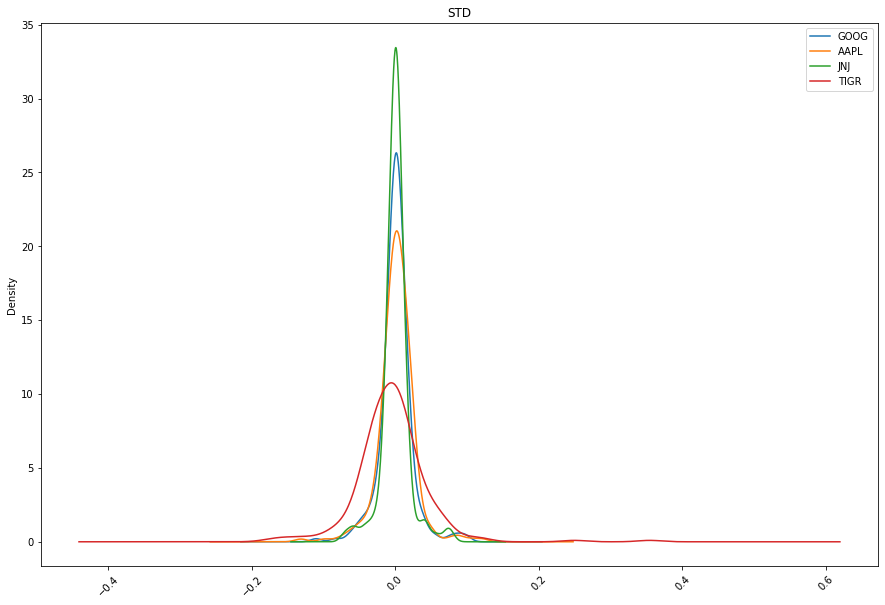

In [25]:
# Visualize the distribution of daily returns across all stocks using a density plot
# YOUR CODE HERE!
df_daily_returns.plot.density(figsize=(15,10), title='STD')
plt.xticks(rotation=45)

In [23]:
df_daily_returns.describe()

,GOOG,AAPL,JNJ,TIGR
count,253.000000,253.000000,253.000000,253.000000
mean,0.000749,0.001588,0.000358,-0.005086
std,0.022984,0.025853,0.019220,0.050255
min,-0.110481,-0.131590,-0.070924,-0.175864
25%,-0.006660,-0.009062,-0.006484,-0.028169
50%,0.000795,0.001144,0.000391,-0.004890
75%,0.009897,0.013612,0.006401,0.014028
max,0.099333,0.121210,0.078439,0.354369
